# 001 Import Dependencies

In [70]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# 002 Data Collection and Processing

In [72]:
# Loading data to pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_Practice_Projects/Project 8 Random Forest Regressor Gold Price Prediction/gld_price_data.csv'
gold_data=pd.read_csv(file_path)
pd.set_option('display.max_columns',None)

In [74]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [75]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [76]:
gold_data.shape

(2290, 6)

In [77]:
# getting some information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [78]:
# checking no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [79]:
# Getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06d4654580>,
      dtype=object)

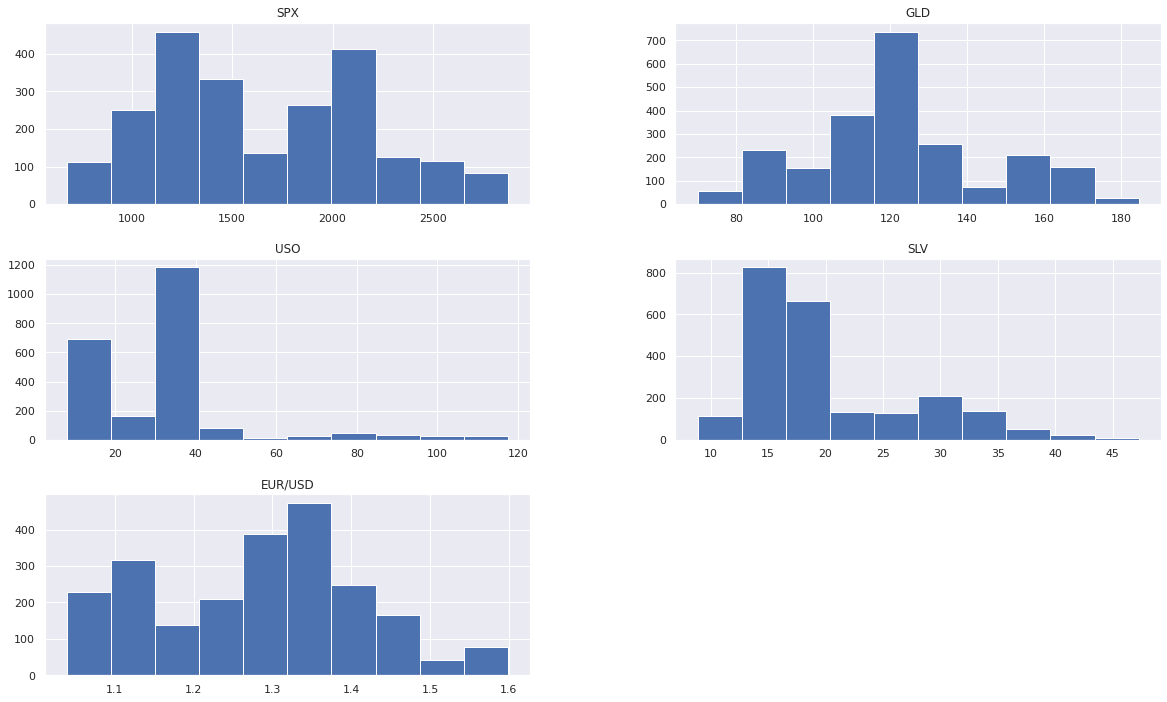

In [80]:
gold_data.hist(figsize=(20,12))

In [81]:
# Find the correlation between datasets
  # Positive
  # Negative

correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


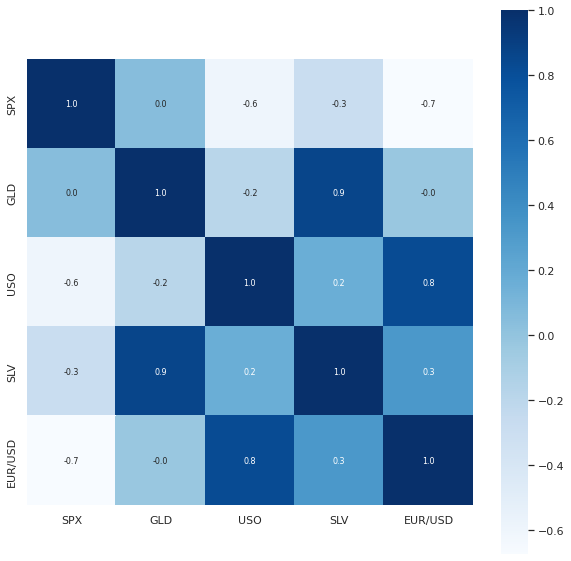

In [82]:
# Constructing the heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [83]:
# correlation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


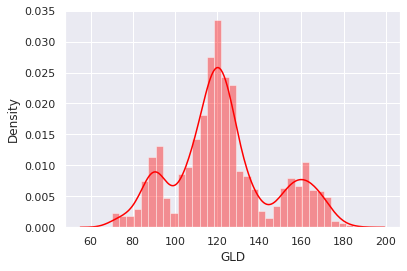

In [84]:
# Checking the distribution of GLD
sns.distplot(gold_data['GLD'], color='red')

# 003 Splitting the features and target

In [85]:
X = gold_data.drop(['GLD','Date'], axis=1)
Y = gold_data['GLD']

In [86]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# 004 Splitting into trainning and testing data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [89]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2290,) (1832,) (458,)


# 005 Model Training --- >>> Random Forest Ensembles

In [90]:
regressor = RandomForestRegressor(n_estimators=100)

In [91]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# 006 Model Evaluation

In [ ]:
# Y_train_prediction = regressor.predict(X_train)

In [ ]:
# Y_train_prediction

array([109.93719791, 114.64590067,  90.66760024, ..., 130.66139658,
       159.90099607, 114.87349952])

In [96]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.77689971  81.81450004 116.2439003  127.65710081 120.6021014
 154.77929746 150.34879806 126.2458999  117.57679909 126.11140041
 116.57620102 172.16440077 141.96269887 167.81829879 115.09700001
 117.89040037 137.7550032  170.32880118 159.35610313 159.03759985
 155.06560039 124.62250023 176.08519952 157.3196033  125.17890025
  93.95029966  77.43810004 120.97540005 119.07299927 167.51929961
  88.05820054 125.13530023  91.34350052 117.68630019 121.10779945
 136.24380086 115.61260137 115.38070042 146.73169935 107.4828013
 104.20570262  87.03879788 126.56430045 118.22759959 153.09799854
 119.69309989 108.29000026 107.95159835  93.18410012 126.9696979
  75.27570049 113.68509946 121.22260028 111.31459906 118.75859904
 120.96219906 158.71060036 168.33340088 147.05919738  86.01589858
  94.32270002  86.81339888  90.37150046 118.78490101 126.48180047
 127.51320001 170.63699963 122.23849887 117.31409928  98.2994004
 167.83530065 142.67629707 131.75110273 121.11520196 121.21799928
 119.74030052 

In [99]:
# R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error score is ", error_score)

R Squared error score is  0.9895102935838862


Compare the actual values and predicted values in a plot

In [100]:
Y_Test = list(Y_test)


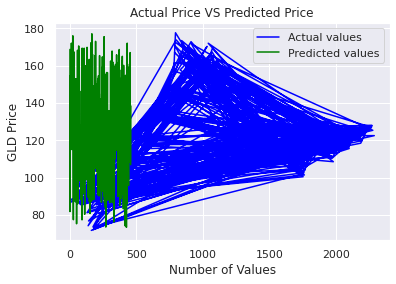

In [101]:
plt.plot(Y_test, color ='blue', label='Actual values')
plt.plot(test_data_prediction, color ='green', label= 'Predicted values')
plt.title('Actual Price VS Predicted Price' )
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()